# White Wine prediction - Machine Learning Project

by: Farzam Salimi, Rojan Aslani

wine quality Dataset

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Objective: 
Classification: Try to predict for future samples what the class is for each sample

Classification models: kNN, Naive Bayes, Log Regression, SVM

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

plt.rc("font", size=14)


The predictive attributes that are releavnt for induction of the quality of wine are:

"fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "density", "pH","sulphate", "alcohol", "class"

The quality has 11 classes: from 0 to 10. in this dataset all values lye within 3-9, having no instances of class 0,1,2, and 10. 

In [208]:
cols = ["fix_acidity", "vol_acidity", "critic_acidity", "res_sugar", "chloride", "free_SO2", "tot_SO2", "density", "pH","sulphate", "alcohol", "class"] # Quality is class

df = pd.read_csv("winequality-white.csv", names = cols, delimiter=";", header=0)

# We know that the class is g so this is supervised learning - for each input we have a corresponding output
df.head()

,fix_acidity,vol_acidity,critic_acidity,res_sugar,chloride,free_SO2,tot_SO2,density,pH,sulphate,alcohol,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##Decompositional strategy


A decompositional strategy decomposes the original multi-class classification task into several binary classification tasks, for which any binary classification algorithm can be used.The binary classification outputs are then combined

to obtain a multi-class classification. The two main decomposition strategies
are one-against-one and one-against-all.

#Data Exploration

Datafram has no missing data.

all variables are float, except for quality (class) which is int.


In [209]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fix_acidity     4898 non-null   float64
 1   vol_acidity     4898 non-null   float64
 2   critic_acidity  4898 non-null   float64
 3   res_sugar       4898 non-null   float64
 4   chloride        4898 non-null   float64
 5   free_SO2        4898 non-null   float64
 6   tot_SO2         4898 non-null   float64
 7   density         4898 non-null   float64
 8   pH              4898 non-null   float64
 9   sulphate        4898 non-null   float64
 10  alcohol         4898 non-null   float64
 11  class           4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


(4898, 12)

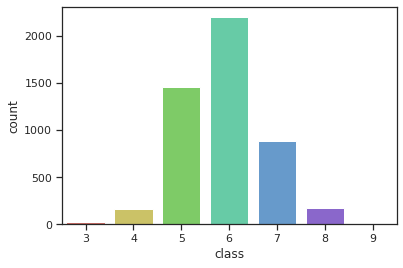

In [210]:
sns.countplot(x=df["class"], data = df, palette = 'hls')
plt.show()


In [211]:
df["class"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: class, dtype: int64

In [212]:
# for label in cols[:-1]: # -1 : for all columns except for the last one (class)
#   # Density = True with normalize them so its easier and more correct for comparison of the two
#   plt.scatter(df[label], df["class"], alpha = 0.2)
#   plt.title(label)
#   plt.xlabel(label)
#   plt.ylabel("Class")
#   plt.legend()
#   plt.show()

In [213]:
# for label in cols[:-1]: # -1 : for all columns except for the last one (class)
#   # Density = True with normalize them so its easier and more correct for comparison of the two
#   plt.hist(df[label], color = 'blue', alpha = 0.7,  bins = 20) # all the different values that belong to class g for this specific label
#   #plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True) # all the different values that belong to class h for this specific label
#   plt.title(label)
#   plt.xlabel(label)
#   plt.ylabel("Count")
#   plt.legend()
#   plt.show()

We need to scale (normalize) the data for each column because of the high variability between the columns. To do so, we used standardization method - StandardScaler() function in python. Moreover, oversampling was done for the under sampled attributes. - scaling can and will induce over-fitting.

In [214]:
# Scale (normalize) the results for each column according to its mean and stdev bcuz the variability between different columns is alot
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values # Y axis is the class

  # Take X and fit the transformer to X and transform all those values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Oversample - will match the size of the samples
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  # hstack: horizontally stack - side by side
  data = np.hstack((X, np.reshape(y, (-1,1)))) #X is 2D but y is 1D so we will reshape it to a 2D item - -1,1: -1 means infer what the length of y should be
  return data, X, y


**QUESTION?? WHAT ABOUT CLASSES THAT HAVE NO ATTRIBUTES?? **

Three different datasets were defined: training, validation, and testing.

*   Training: 60%
*   validation: 20%
*   Testing: 20%



In [215]:
#df.loc[df['class'] <= 5, 'class'] = 0
#df.loc[df['class'] > 5, 'class'] = 1

df["class"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: class, dtype: int64

In [216]:
#train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])

In [217]:
train, X_train, y_train = scale_dataset(train, oversample = True)
#df["class"].value_counts()

In [218]:
 # we dont want to oversample these because we want them to be true testing/validation real life datasets
#valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [219]:
df_train = pd.DataFrame(train,columns=cols)
len(df_train["class"].value_counts())

7

In [220]:
# sns.set_theme(style="ticks")
# diverging_colors = sns.color_palette("RdBu", 7)
# sns.pairplot(df_train, hue="class", corner=True, palette = diverging_colors)

In [221]:
# for label in cols[:-1]: # -1 : for all columns except for the last one (class)
#   # Density = True with normalize them so its easier and more correct for comparison of the two
#   plt.scatter(df_train[label], df_train["class"], alpha = 0.2)
#   plt.title(label)
#   plt.xlabel(label)
#   plt.ylabel("Class")
#   plt.legend()
#   plt.show()

In [222]:
#for label in cols[:-1]: # -1 : for all columns except for the last one (class)
#  # Density = True with normalize them so its easier and more correct for comparison of the two
#  plt.hist(df_train[label], color = 'blue', alpha = 0.7,  bins = 20) # all the different values that belong to class g for this specific label
#  #plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True) # all the different values that belong to class h for this specific label
#  plt.title(label)
#  plt.xlabel(label)
#  plt.ylabel("Count")
#  plt.legend()
#  plt.show()

In [223]:
df_train["class"].value_counts()

6.0    1760
7.0    1760
5.0    1760
4.0    1760
8.0    1760
3.0    1760
9.0    1760
Name: class, dtype: int64

#Distance-based Algorithm


##kNN (neighbors)

In [224]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [225]:
knn_model = KNeighborsClassifier(n_neighbors=2) # n = 2 has the best result: 58% accuracy
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.30      0.24        30
           5       0.55      0.69      0.61       289
           6       0.65      0.55      0.60       438
           7       0.66      0.57      0.61       187
           8       0.41      0.44      0.42        32
           9       0.00      0.00      0.00         0

    accuracy                           0.58       980
   macro avg       0.35      0.36      0.35       980
weighted avg       0.60      0.58      0.58       980



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**k-NN**

**PROS**:

• Simplicity

• Good predictive power in several
problems

• Inherently incremental: if new objects
are incorporated into the training set,
they will be automatically considered
when the algorithm needs to predict
the class of a new object

**CONS**:

• Long time required to classify new
objects

• Uses only local information to classify
new objects

• Sensitive to presence of irrelevant
attributes

• Predictive quantitative attributes should
be normalized

• Somewhat sensitive to the presence of
outliers

• No model, so no interpretation possible.

#Probability-based Algorithms


## LogisticRegression - Discriminative algorithm

The classification will be done by binary or multiclass according to the input data.

In [226]:
# for label in cols[:-1]: # -1 : for all columns except for the last one (class)
#   # Density = True with normalize them so its easier and more correct for comparison of the two
#   plt.scatter(df_train[label], df_train["class"], alpha = 0.2)
#   plt.title(label)
#   plt.xlabel(label)
#   plt.ylabel("Class")
#   plt.legend()
#   plt.show()

Clearly we cannot use linear regression for this dataset.

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
model = LogisticRegression(max_iter = 10000, verbose = 0, random_state=16)#, solver='liblinear')
history = model.fit(X_train, y_train)

In [229]:
y_pred = model.predict(X_test)

In [230]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
# Binary: 0.72
# Multiclass: 0.27

Accuracy of logistic regression classifier on test set: 0.28


In [231]:
print(classification_report(y_test, y_pred, zero_division=0)) # https://en.wikipedia.org/wiki/Precision_and_recall
#We want high precision and low recall 

              precision    recall  f1-score   support

           3       0.01      0.25      0.01         4
           4       0.12      0.53      0.19        30
           5       0.49      0.43      0.46       289
           6       0.55      0.18      0.27       438
           7       0.36      0.27      0.31       187
           8       0.05      0.25      0.09        32
           9       0.00      0.00      0.00         0

    accuracy                           0.28       980
   macro avg       0.23      0.27      0.19       980
weighted avg       0.46      0.28      0.32       980



In the example of wine quality predictoin, type I and type II error are equality unwanted, we can use f1-score as a parameter to evaluate the model's performance.


1.   The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
2.   The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
3.   The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
4.   The **support** is the number of occurrences of each class in y_test.



https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Text(30.5, 0.5, 'Truth')

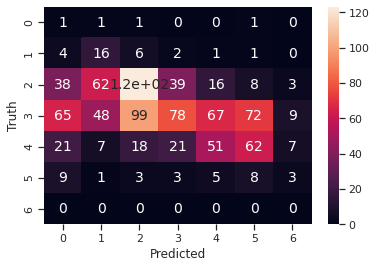

In [232]:
#Where is the model failing? - confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

LOGISTIC REGRESSION

**PROS**:

• Easily interpretable

• No hyper-parameters

**CONS**:

• Restricted to linearly separable binary classification tasks

• Number of instances must be larger than number of
attributes

• Sensitive to correlated predictive attributes

• Sensitive to outliers

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Naive Bayes - Generative algorithm

In [233]:
from sklearn.naive_bayes import GaussianNB

In [234]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.05      0.25      0.08         4
           4       0.16      0.60      0.25        30
           5       0.45      0.53      0.49       289
           6       0.58      0.08      0.14       438
           7       0.27      0.43      0.33       187
           8       0.04      0.09      0.06        32
           9       0.00      0.00      0.00         0

    accuracy                           0.30       980
   macro avg       0.22      0.28      0.19       980
weighted avg       0.45      0.30      0.28       980



Text(30.5, 0.5, 'Truth')

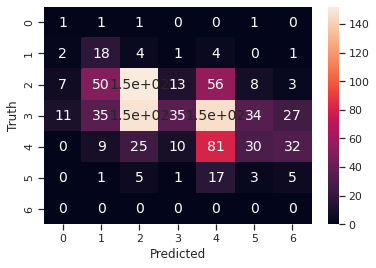

In [235]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Naive Bayes**

**PROS**:

• Good predictive performance in classification tasks where the predictive attributes are independent

• Robust to the presence of noise data
and irrelevant attributes

• Cast training, since it induces
classification models by looking at
the training set only once

• Prediction of class labels for new
objects is also fast

• Induced models are easy to interpret

• No hyper-parameters

**CONS**:

• One of the reasons for the fast learning is
also a limitation of NB: it does not take
into account relation between predictive
attributes

• Can benefit from feature selection

• Struggles to deal with continuous
quantitative values in the predictive
attributes

# Search-based Algorithms: predictive learning algorithm

##Artificial neural networks

In [236]:
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping

In [237]:
def plot_history(history):
  history_dict = history.history

  # learning curve
  # accuracy
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']

  # loss
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  # range of X (no. of epochs)
  epochs = range(1, len(acc) + 1)

  # plot
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()


In [238]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [245]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  model = Sequential()
  model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu')) # input shape is (features,)
  model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
  model.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu'))
  model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
  model.add(Dense(6, activation='softmax'))

  model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

  # early stopping callback
  # This callback will stop the training when there is no improvement in the validation loss for 10 consecutive epochs.  
  es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                    mode='min',
                                    patience=10, 
                                    restore_best_weights=True)

  history = model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, shuffle=True, callbacks=[es], verbose = 0
  )

  return model, history

In [247]:
# least_val_loss = float ('inf')
# least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}, epochs {epochs}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_test, y_test)
#         #if val_loss < least_val_loss:
#         #  least_val_loss = val_loss
#         #  least_loss_model = model

nodes 16, dropout 0, lr 0.1, batch_size 32, epochs 100


ValueError: ignored

In [241]:
# y_pred = least_loss_model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
# print(classification_report(y_test, y_pred))

**Neural Network**

**PROS**:

• Exhibits most of the positive aspects
of ANNs

• deep network models have exhibited
very good performance in many real
problems, superior to several
state-of-the-art ML algorithms

• Very robust in the presence of noise

• Able to extract relevant features from
raw data

• Similar to several features found in
the nervous system.

**CONS**:

• Exhibits most of the deficiencies of ANNs

• DL needs of a large number of training
examples

• Lack of strong mathematical foundation

##Support Vector Machines (SVM)

In [242]:
from sklearn.svm import SVC

In [243]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.17      0.25      0.20         4
           4       0.15      0.57      0.24        30
           5       0.57      0.54      0.55       289
           6       0.59      0.35      0.44       438
           7       0.43      0.56      0.48       187
           8       0.16      0.44      0.23        32
           9       0.00      0.00      0.00         0

    accuracy                           0.45       980
   macro avg       0.29      0.38      0.31       980
weighted avg       0.52      0.45      0.47       980



**SVM**

**PROS**:

• SVM models have strong theoretical
foundations

• SVM models have exhibited good
predictive performance in many
problems

**CONS**:

• Very sensitive to hyper-parameter values

• Computational cost depends on the number
of support vectors of the model, which can be
large in some problems

• Original technique can only deal with binary
classification tasks

## Random Forests

Decision tree induction algorithm <-> Decision tree <-> classification tree

**Random Forests**

**PROS**:

• Very good predictive performance in
many problems

• Easy to define/tune hyper-parameters

**CONS**:

• Computationally expensive since the
number of recommended trees is large,
but, like bagging, can be parallelized

• Randomization, but this can be
minimized using the recommended
number of trees

##AdaBoost

**AdaBoost**

**PROS**:

• Good predictive performance in several
problems

• Easy to define/tune its hyper-parameter

**CONS**:

• Computationally expensive since the
number of generated models depends on
the number of iterations and there is no
parallelization possibile because it is a
sequential algorithm

• Hard to interpret

#Optimization-based Algorithms: predictive learning algorithm